In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

CUTOFF = 0.4

In [2]:
aggregated_data = pd.read_csv("aggregated_data.csv")
aggregated_data.head()

,Unnamed: 0,Player,Season,AS,Age,Pos,Tm,G,GS,MP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,10,Aaron Brooks,2009,0,24,PG,80,80,35,25.0,...,0.866000,0.400000,1.600000,2.000000,3.000000,0.600000,0.100000,1.600000,1.900000,11.200000
1,28,Aaron Gray,2009,0,24,C,56,56,18,12.8,...,0.576000,1.500000,2.400000,3.900000,0.800000,0.300000,0.300000,0.700000,2.400000,3.500000
2,54,Acie Law,2009,0,24,PG,55,55,1,10.2,...,0.817000,0.100000,0.900000,1.100000,1.600000,0.200000,0.100000,0.500000,0.800000,2.900000
3,59,Adam Morrison,2009,0,24,SF,52,104,10,34.4,...,0.730346,0.342308,1.211538,1.503846,0.811538,0.184615,0.092308,0.626923,1.507692,4.003846
4,72,Al Harrington,2009,0,28,PF,73,146,112,103.1,...,0.788089,1.373973,4.902055,6.226027,1.420548,1.206849,0.289726,2.219178,3.089726,20.115753


In [3]:
data = aggregated_data.drop(columns=['Unnamed: 0'])
data.head()

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Brooks,2009,0,24,PG,80,80,35,25.0,4.000000,...,0.866000,0.400000,1.600000,2.000000,3.000000,0.600000,0.100000,1.600000,1.900000,11.200000
1,Aaron Gray,2009,0,24,C,56,56,18,12.8,1.400000,...,0.576000,1.500000,2.400000,3.900000,0.800000,0.300000,0.300000,0.700000,2.400000,3.500000
2,Acie Law,2009,0,24,PG,55,55,1,10.2,0.900000,...,0.817000,0.100000,0.900000,1.100000,1.600000,0.200000,0.100000,0.500000,0.800000,2.900000
3,Adam Morrison,2009,0,24,SF,52,104,10,34.4,1.507692,...,0.730346,0.342308,1.211538,1.503846,0.811538,0.184615,0.092308,0.626923,1.507692,4.003846
4,Al Harrington,2009,0,28,PF,73,146,112,103.1,7.300685,...,0.788089,1.373973,4.902055,6.226027,1.420548,1.206849,0.289726,2.219178,3.089726,20.115753


In [4]:
data.columns

Index(['Player', 'Season', 'AS', 'Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FGP', 'three_P', 'three_PA', 'three_PP', 'two_P', 'two_PA',
       'two_PP', 'eFGP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [5]:
# data = data.rename(columns={"3P": "three_P", "3PA": "three_PA", "3PP": "three_PP", "2P": "two_P", "2PA": "two_PA", "2PP": "two_PP"})
data.columns

Index(['Player', 'Season', 'AS', 'Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FGP', 'three_P', 'three_PA', 'three_PP', 'two_P', 'two_PA',
       'two_PP', 'eFGP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [6]:
data.groupby(by="Season").sum()["AS"]

Season
2009    26
2010    28
2011    23
2012    25
2013    24
2014    25
2015    28
2016    26
2017    25
2018    28
2019    27
2020    24
2021    27
2022    27
2023    27
Name: AS, dtype: int64

In [7]:
train_data = data[data["Season"] % 3 == 1]
train_data

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
712,A.J. Price,2011,0,24,PG,50,50,0,15.9,2.300000,...,0.667000,0.300000,1.100000,1.400000,2.200000,0.600000,0.000000,1.100000,1.200000,6.500000
713,Aaron Brooks,2011,0,26,PG,59,118,24,64.6,3.694068,...,0.884822,0.321186,0.994068,1.315254,3.934746,0.578814,0.078814,1.692373,1.907627,10.726271
714,Acie Law,2011,0,26,PG,51,102,0,38.5,1.616667,...,0.729353,0.210784,1.006863,1.217647,1.646078,0.617647,0.000000,0.810784,1.206863,4.218627
715,Al Harrington,2011,0,30,PF,73,73,3,22.8,3.800000,...,0.735000,1.000000,3.500000,4.500000,1.400000,0.500000,0.100000,1.500000,2.800000,10.500000
716,Al Thornton,2011,0,27,PF,71,142,46,55.6,2.876056,...,0.777155,0.788028,2.184507,3.007042,0.872535,0.503521,0.184507,0.900000,2.003521,7.390141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,Rudy Gobert,2023,0,30,C,54,54,54,30.4,5.200000,...,0.661000,3.200000,8.400000,11.600000,0.900000,0.800000,1.400000,1.700000,3.000000,13.600000
6296,Stephen Curry,2023,1,34,PG,39,39,39,34.5,9.700000,...,0.925000,0.600000,5.700000,6.200000,6.400000,1.000000,0.400000,3.200000,2.200000,29.400000
6297,Trae Young,2023,0,24,PG,57,57,57,35.1,8.400000,...,0.890000,0.800000,2.300000,3.000000,10.100000,1.100000,0.200000,4.100000,1.500000,26.700000
6298,Zach LaVine,2023,0,27,SG,61,61,61,36.0,8.500000,...,0.844000,0.500000,4.200000,4.700000,4.000000,0.900000,0.200000,2.600000,2.200000,24.700000


In [8]:
test_data = data[data["Season"] % 3 != 1]
test_data

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Brooks,2009,0,24,PG,80,80,35,25.0,4.000000,...,0.866000,0.400000,1.600000,2.000000,3.000000,0.600000,0.100000,1.600000,1.900000,11.200000
1,Aaron Gray,2009,0,24,C,56,56,18,12.8,1.400000,...,0.576000,1.500000,2.400000,3.900000,0.800000,0.300000,0.300000,0.700000,2.400000,3.500000
2,Acie Law,2009,0,24,PG,55,55,1,10.2,0.900000,...,0.817000,0.100000,0.900000,1.100000,1.600000,0.200000,0.100000,0.500000,0.800000,2.900000
3,Adam Morrison,2009,0,24,SF,52,104,10,34.4,1.507692,...,0.730346,0.342308,1.211538,1.503846,0.811538,0.184615,0.092308,0.626923,1.507692,4.003846
4,Al Harrington,2009,0,28,PF,73,146,112,103.1,7.300685,...,0.788089,1.373973,4.902055,6.226027,1.420548,1.206849,0.289726,2.219178,3.089726,20.115753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,Nikola Jokic,2022,1,26,C,74,74,74,33.5,10.300000,...,0.810000,2.800000,11.000000,13.800000,7.900000,1.500000,0.900000,3.800000,2.600000,27.100000
5849,Rudy Gobert,2022,1,29,C,66,66,66,32.1,5.500000,...,0.690000,3.700000,11.000000,14.700000,1.100000,0.700000,2.100000,1.800000,2.700000,15.600000
5850,Stephen Curry,2022,1,33,PG,64,64,64,34.5,8.400000,...,0.923000,0.500000,4.700000,5.200000,6.300000,1.300000,0.400000,3.200000,2.000000,25.500000
5851,Trae Young,2022,1,23,PG,76,76,76,34.9,9.400000,...,0.904000,0.700000,3.100000,3.700000,9.700000,0.900000,0.100000,4.000000,1.700000,28.400000


In [9]:
test_2023 = data[data["Season"] == 2023]
test_2020 = data[data["Season"] == 2020]
test_2017 = data[data["Season"] == 2017]
test_2014 = data[data["Season"] == 2014]
test_2011 = data[data["Season"] == 2011]

true_2023_as = test_2023.loc[test_2023['AS'] == 1, 'Player'].to_numpy()
true_2023_as_count = len(true_2023_as)
true_2020_as = test_2020.loc[test_2020['AS'] == 1, 'Player'].to_numpy()
true_2020_as_count = len(true_2020_as)
true_2017_as = test_2017.loc[test_2017['AS'] == 1, 'Player'].to_numpy()
true_2017_as_count = len(true_2017_as)
true_2014_as = test_2014.loc[test_2014['AS'] == 1, 'Player'].to_numpy()
true_2014_as_count = len(true_2014_as)
true_2011_as = test_2011.loc[test_2011['AS'] == 1, 'Player'].to_numpy()
true_2011_as_count = len(true_2011_as)
print(true_2023_as_count, true_2020_as_count, true_2017_as_count, true_2014_as_count, true_2011_as_count)

27 24 25 25 23


In [10]:
test_2023

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5853,A.J. Green,2023,0,23,SG,30,30,0,9.7,1.6,...,1.000,0.2,1.0,1.2,0.6,0.2,0.0,0.3,1.0,4.6
5854,AJ Griffin,2023,0,19,SF,59,59,11,19.8,3.5,...,0.875,0.4,1.6,2.0,1.0,0.7,0.1,0.6,1.2,8.9
5855,Aaron Gordon,2023,0,27,PF,52,52,52,30.0,6.5,...,0.627,2.4,4.4,6.8,2.9,0.8,0.8,1.6,1.9,16.9
5856,Aaron Holiday,2023,0,26,PG,52,52,5,14.0,1.5,...,0.857,0.4,0.9,1.3,1.3,0.5,0.2,0.6,1.3,4.1
5857,Aaron Nesmith,2023,0,23,SF,57,57,45,24.4,3.3,...,0.864,0.8,2.9,3.7,1.2,0.8,0.4,0.9,3.4,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,Rudy Gobert,2023,0,30,C,54,54,54,30.4,5.2,...,0.661,3.2,8.4,11.6,0.9,0.8,1.4,1.7,3.0,13.6
6296,Stephen Curry,2023,1,34,PG,39,39,39,34.5,9.7,...,0.925,0.6,5.7,6.2,6.4,1.0,0.4,3.2,2.2,29.4
6297,Trae Young,2023,0,24,PG,57,57,57,35.1,8.4,...,0.890,0.8,2.3,3.0,10.1,1.1,0.2,4.1,1.5,26.7
6298,Zach LaVine,2023,0,27,SG,61,61,61,36.0,8.5,...,0.844,0.5,4.2,4.7,4.0,0.9,0.2,2.6,2.2,24.7


Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.

In [11]:
predictors = train_data.drop(["Player", "Season", "AS"], axis=1)
predictors.head()

,Age,Pos,Tm,G,GS,MP,FG,FGA,FGP,three_P,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
712,24,PG,50,50,0,15.9,2.300000,6.400000,0.356000,0.800000,...,0.667000,0.300000,1.100000,1.400000,2.200000,0.600000,0.000000,1.100000,1.200000,6.500000
713,26,PG,59,118,24,64.6,3.694068,9.929661,0.378297,1.194068,...,0.884822,0.321186,0.994068,1.315254,3.934746,0.578814,0.078814,1.692373,1.907627,10.726271
714,26,PG,51,102,0,38.5,1.616667,3.630392,0.417676,0.128431,...,0.729353,0.210784,1.006863,1.217647,1.646078,0.617647,0.000000,0.810784,1.206863,4.218627
715,30,PF,73,73,3,22.8,3.800000,9.200000,0.416000,1.600000,...,0.735000,1.000000,3.500000,4.500000,1.400000,0.500000,0.100000,1.500000,2.800000,10.500000
716,27,PF,71,142,46,55.6,2.876056,6.090141,0.476444,0.084507,...,0.777155,0.788028,2.184507,3.007042,0.872535,0.503521,0.184507,0.900000,2.003521,7.390141


In [12]:
predictors.corr()

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.058395,0.089655,0.087078,0.118639,0.030291,0.032318,-0.008878,0.105058,0.087364,...,0.084833,-0.039707,0.069755,0.038942,0.107612,0.040238,-0.009451,0.024253,0.023887,0.037455
Tm,0.058395,1.000000,0.805897,0.569890,0.373879,0.461854,0.452147,0.273959,0.268365,0.244768,...,0.192766,0.284823,0.425267,0.405490,0.300945,0.425207,0.252299,0.378497,0.473033,0.448103
G,0.089655,0.805897,1.000000,0.557231,0.739851,0.338495,0.343524,0.171959,0.237486,0.222303,...,0.172154,0.171905,0.303668,0.279792,0.232661,0.323988,0.163581,0.289456,0.357103,0.333606
GS,0.087078,0.569890,0.557231,1.000000,0.642453,0.682602,0.676050,0.213559,0.377105,0.372696,...,0.169417,0.383911,0.611290,0.574513,0.496337,0.569834,0.366952,0.603226,0.569161,0.672647
MP,0.118639,0.373879,0.739851,0.642453,1.000000,0.498438,0.519698,0.095919,0.389809,0.398260,...,0.187054,0.168857,0.387861,0.340878,0.395290,0.426674,0.183318,0.456927,0.410151,0.503179
FG,0.030291,0.461854,0.338495,0.682602,0.498438,1.000000,0.978790,0.322461,0.554113,0.559495,...,0.263126,0.400860,0.712482,0.654249,0.641534,0.612016,0.375939,0.828233,0.603711,0.988398
FGA,0.032318,0.452147,0.343524,0.676050,0.519698,0.978790,1.000000,0.168877,0.636141,0.655585,...,0.305427,0.292034,0.644429,0.569425,0.676780,0.629894,0.285239,0.840173,0.569924,0.981629
FGP,-0.008878,0.273959,0.171959,0.213559,0.095919,0.322461,0.168877,1.000000,-0.100492,-0.162068,...,-0.087889,0.529703,0.420633,0.479340,0.042300,0.127461,0.441551,0.172163,0.370755,0.266799
three_P,0.105058,0.268365,0.237486,0.377105,0.389809,0.554113,0.636141,-0.100492,1.000000,0.983593,...,0.380651,-0.208810,0.199447,0.081066,0.453635,0.392795,-0.087254,0.428396,0.248393,0.621203
three_PA,0.087364,0.244768,0.222303,0.372696,0.398260,0.559495,0.655585,-0.162068,0.983593,1.000000,...,0.374214,-0.215206,0.204328,0.082654,0.477917,0.408527,-0.093024,0.458415,0.252553,0.628136


In [13]:
corr_matrix = train_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

to_drop


C:\Users\msbow\AppData\Local\Temp\ipykernel_16372\2058914866.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['G',
 'MP',
 'FGA',
 'three_PA',
 'two_P',
 'two_PA',
 'two_PP',
 'eFGP',
 'FT',
 'FTA',
 'DRB',
 'TRB',
 'TOV',
 'PTS']

In [14]:
corr_matrix = train_data.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('Tm', 'G'),
 ('G', 'MP'),
 ('FG', 'FGA'),
 ('FG', 'two_P'),
 ('FG', 'two_PA'),
 ('FG', 'FT'),
 ('FG', 'FTA'),
 ('FG', 'DRB'),
 ('FG', 'TOV'),
 ('FG', 'PTS'),
 ('FGA', 'two_P'),
 ('FGA', 'two_PA'),
 ('FGA', 'FT'),
 ('FGA', 'FTA'),
 ('FGA', 'TOV'),
 ('FGA', 'PTS'),
 ('FGP', 'two_PP'),
 ('FGP', 'eFGP'),
 ('three_P', 'three_PA'),
 ('two_P', 'two_PA'),
 ('two_P', 'FT'),
 ('two_P', 'FTA'),
 ('two_P', 'DRB'),
 ('two_P', 'TRB'),
 ('two_P', 'TOV'),
 ('two_P', 'PTS'),
 ('two_PA', 'FT'),
 ('two_PA', 'FTA'),
 ('two_PA', 'DRB'),
 ('two_PA', 'TOV'),
 ('two_PA', 'PTS'),
 ('two_PP', 'eFGP'),
 ('FT', 'FTA'),
 ('FT', 'TOV'),
 ('FT', 'PTS'),
 ('FTA', 'TOV'),
 ('FTA', 'PTS'),
 ('ORB', 'DRB'),
 ('ORB', 'TRB'),
 ('DRB', 'TRB'),
 ('AST', 'TOV'),
 ('TOV', 'PTS')]

In [15]:
predictors.columns

Index(['Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGP', 'three_P',
       'three_PA', 'three_PP', 'two_P', 'two_PA', 'two_PP', 'eFGP', 'FT',
       'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [16]:
logit_model_including_all = sm.logit(formula = 'AS~'+'+'.join(predictors.columns), data = train_data).fit() #Developing logistic regression model
logit_model_including_all.summary()

Optimization terminated successfully.
         Current function value: 0.061386
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     AS   No. Observations:                 2099
Model:                          Logit   Df Residuals:                     2067
Method:                           MLE   Df Model:                           31
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.7265
Time:                        03:47:21   Log-Likelihood:                -128.85
converged:                       True   LL-Null:                       -471.05
Covariance Type:            nonrobust   LLR p-value:                4.215e-124
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.2054      9.829     -2.564      0.010     -44.470      -5.940
Pos[T.PF]      0.9026      0.595      1.517      0.129      -0.263       2.068
Pos[T.PG]      0.6213      1.018      0.610      0.542      -1.374       2.616
Pos[T.SF]      0.2542      0.845      0.301      0.764      -1.402       1.911
Pos[T.SG]      0.6193      0.947      0.654      0.513      -1.236       2.475
Age            0.1060      0.048      2.210      0.027       0.012       0.200
Tm             0.1124      0.063      1.786      0.074      -0.011       0.236
G             -0.4055      0.253     -1.600      0.110      -0.902       0.091
GS             0.3637      0.249      1.460      0.144      -0.125       0.852
MP             0.0393      0.058      0.674      0.500      -0.075       0.154
FG             1.3234      5.110      0.259      0.796      -8.691      11.338
FGA           -1.0345      3.392     -0.305      0.760      -7.683       5.614
FGP           70.2921     29.329      2.397      0.017      12.808     127.776
three_P       -2.2722      4.953     -0.459      0.646     -11.981       7.436
three_PA      -0.0094      3.346     -0.003      0.998      -6.567       6.549
three_PP       2.1984      1.806      1.218      0.223      -1.341       5.737
two_P         -4.2734      3.890     -1.099      0.272     -11.897       3.351
two_PA         0.5233      3.329      0.157      0.875      -6.002       7.048
two_PP        20.5118     13.013      1.576      0.115      -4.993      46.016
eFGP         -93.2665     34.064     -2.738      0.006    -160.032     -26.501
FT            -3.0561      2.540     -1.203      0.229      -8.035       1.922
FTA            1.2830      1.077      1.191      0.234      -0.829       3.395
FTP           10.8429      6.930      1.565      0.118      -2.739      24.425
ORB           -2.0154      3.764     -0.535      0.592      -9.393       5.362
DRB           -0.5042      3.697     -0.136      0.892      -7.751       6.743
TRB            1.1761      3.710      0.317      0.751      -6.094       8.447
AST            0.2246      0.157      1.428      0.153      -0.084       0.533
STL            1.2357      0.531      2.328      0.020       0.195       2.276
BLK            0.8989      0.448      2.008      0.045       0.021       1.776
TOV            0.2527      0.429      0.588      0.556      -0.589       1.094
PF            -0.3585      0.369     -0.970      0.332      -1.083       0.366
PTS            1.9899      2.310      0.861      0.389      -2.537       6.517
==============================================================================

Possibly complete quasi-separation: A fraction 0.74 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [17]:
pred = [p for p in predictors.columns]
reduced_predictors = [p for p in predictors if p not in to_drop]
print(reduced_predictors)
logit_model_less_corr = sm.logit(formula = 'AS~'+'+'.join(reduced_predictors), data = train_data).fit() #Developing logistic regression model
logit_model_less_corr.summary()

['Age', 'Pos', 'Tm', 'GS', 'FG', 'FGP', 'three_P', 'three_PP', 'FTP', 'ORB', 'AST', 'STL', 'BLK', 'PF']
Optimization terminated successfully.
         Current function value: 0.075264
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     AS   No. Observations:                 2099
Model:                          Logit   Df Residuals:                     2081
Method:                           MLE   Df Model:                           17
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.6646
Time:                        03:47:21   Log-Likelihood:                -157.98
converged:                       True   LL-Null:                       -471.05
Covariance Type:            nonrobust   LLR p-value:                4.122e-122
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.3103      3.977     -7.370      0.000     -37.105     -21.516
Pos[T.PF]      0.6236      0.522      1.194      0.232      -0.400       1.647
Pos[T.PG]     -1.4515      0.812     -1.788      0.074      -3.042       0.139
Pos[T.SF]     -0.2636      0.716     -0.368      0.713      -1.668       1.140
Pos[T.SG]     -0.9731      0.758     -1.283      0.200      -2.460       0.513
Age            0.1029      0.042      2.463      0.014       0.021       0.185
Tm             0.0664      0.016      4.079      0.000       0.034       0.098
GS             0.0079      0.008      0.961      0.337      -0.008       0.024
FG             0.9131      0.116      7.904      0.000       0.687       1.140
FGP           12.0254      4.300      2.797      0.005       3.598      20.453
three_P        0.3885      0.224      1.734      0.083      -0.051       0.828
three_PP      -0.7709      1.743     -0.442      0.658      -4.187       2.645
FTP            4.8843      2.558      1.910      0.056      -0.128       9.897
ORB            0.0356      0.293      0.122      0.903      -0.538       0.609
AST            0.5781      0.117      4.955      0.000       0.349       0.807
STL            1.2919      0.455      2.840      0.005       0.400       2.184
BLK            1.0201      0.387      2.638      0.008       0.262       1.778
PF            -0.0683      0.319     -0.214      0.831      -0.694       0.557
==============================================================================

Possibly complete quasi-separation: A fraction 0.46 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve


def confusion_matrix_year(model, test_ds, as_count):
    # Assume new_data is a dataframe containing the predictor variables for the new observations
    pred_probs = model.predict(test_ds)  # Predict the probabilities of AS=1 for each observation
    pred_probs_sorted = pred_probs.sort_values(ascending=False)  # Sort the probabilities in descending order
    top_indices = pred_probs_sorted.head(as_count).index  # Get the indices of the top n observations with the highest probabilities
    predicted_classes = pd.Series(0, index=test_ds.index)  # Create a Series to store the predicted classes (0 or 1) for each observation
    predicted_classes.loc[top_indices] = 1  # Set the top n predicted classes to 1, and the rest to 0
    true_values = test_ds['AS']
    confusion = pd.DataFrame(confusion_matrix(true_values, predicted_classes))
    confusion.columns = ['Predicted 0', 'Predicted 1']
    confusion = confusion.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(confusion)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(true_values, predicted_classes)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))


Classification accuracy = 97.8%
Precision = 81.5%
TPR or Recall = 81.5%
FNR = 18.5%
FPR = 1.2%
ROC-AUC = 90.1%


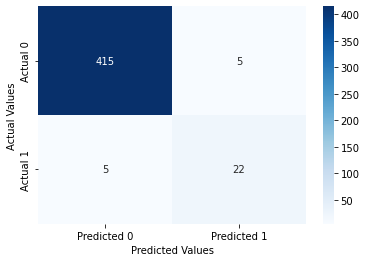

In [19]:
confusion_matrix_year(logit_model_including_all, test_2023, true_2023_as_count)

Classification accuracy = 97.9%
Precision = 79.2%
TPR or Recall = 79.2%
FNR = 20.8%
FPR = 1.1%
ROC-AUC = 89.0%


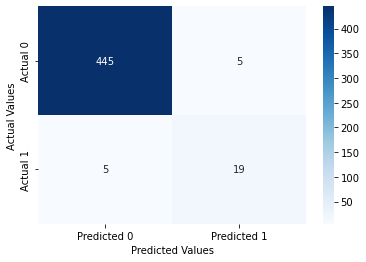

In [20]:
confusion_matrix_year(logit_model_including_all, test_2020, true_2020_as_count)

Classification accuracy = 96.8%
Precision = 72.0%
TPR or Recall = 72.0%
FNR = 28.0%
FPR = 1.7%
ROC-AUC = 85.1%


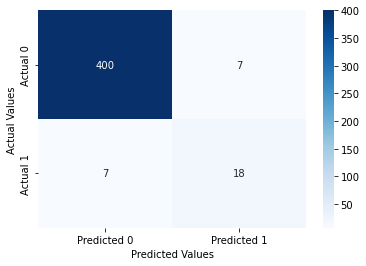

In [21]:
confusion_matrix_year(logit_model_including_all, test_2017, true_2017_as_count)

Classification accuracy = 95.9%
Precision = 68.0%
TPR or Recall = 68.0%
FNR = 32.0%
FPR = 2.2%
ROC-AUC = 82.9%


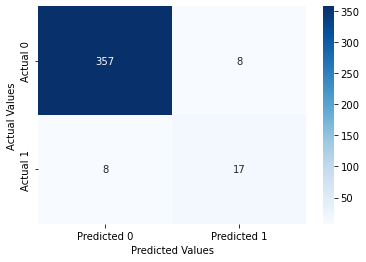

In [22]:
confusion_matrix_year(logit_model_including_all, test_2014, true_2014_as_count)

Classification accuracy = 97.2%
Precision = 78.3%
TPR or Recall = 78.3%
FNR = 21.7%
FPR = 1.5%
ROC-AUC = 88.4%


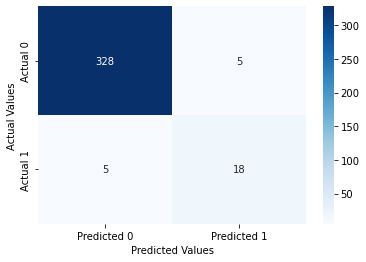

In [23]:
confusion_matrix_year(logit_model_including_all, test_2011, true_2011_as_count)

Classification accuracy

In [24]:
#Function to compute confusion matrix and prediction accuracy on training data

def confusion_matrix_train(model,cutoff=CUTOFF):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    print(cm_df)
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    


Train

        0     1
0  1946.0  29.0
1    26.0  98.0
Classification accuracy = 97.4%


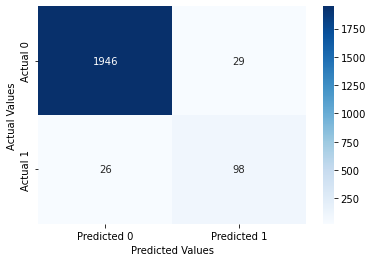

In [25]:
cm_train = confusion_matrix_train(logit_model_including_all)

The prediction accuracy was found to be 96.7% for train data.

In [26]:
#Function to compute confusion matrix and prediction accuracy on test data

def confusion_matrix_test(data,actual_values,model,cutoff=CUTOFF):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))


Test

Classification accuracy = 96.1%


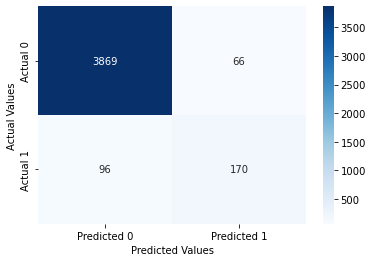

In [27]:
confusion_matrix_test(test_data,test_data.AS,logit_model_including_all)

The prediction accuracy was found to be 95.0% for test data.

Recall

What is the minimum Recall of the model among the Recall performance on train data and test data? Consider a decision threshold probability of 30% when classifying observations.

Here, Recall is the proportion of players predicted to take part in the all star team among those who actually turn out to become all stars.

Recall: Mathematically, we define recall as the number of true positives divided by the number of true positives plus the number of false negatives.

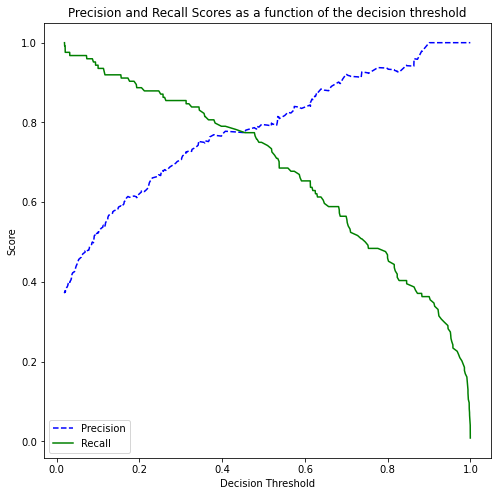

In [28]:

y = train_data.AS
ypred = logit_model_including_all.predict(train_data)
p, r, thresholds = precision_recall_curve(y, ypred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()

plot_precision_recall_vs_threshold(p, r, thresholds)

AUC:  0.988399346672111


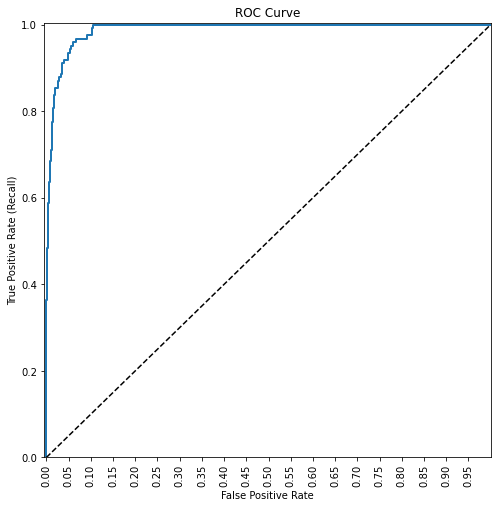

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    #plt.plot(fpr[np.argmax(net_profit_array_notperperson)+1],tpr[np.argmax(net_profit_array_notperperson)+1], marker="o")
    plt.plot([0, 1], [0, 1], 'k--')   
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print("AUC: ", auc(fpr, tpr))# AUC of ROC

plot_roc_curve(fpr, tpr)

In [30]:
#Function to compute confusion matrix and prediction accuracy on test/train data

def confusion_matrix_data(data,actual_values,model,cutoff=CUTOFF):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Train

Classification accuracy = 97.4%
Precision = 77.2%
TPR or Recall = 79.0%
FNR = 21.0%
FPR = 1.5%
ROC-AUC = 98.8%


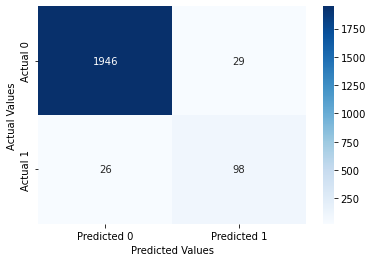

In [31]:
confusion_matrix_data(train_data,train_data.AS,logit_model_including_all,CUTOFF)

Test

Classification accuracy = 96.1%
Precision = 72.0%
TPR or Recall = 63.9%
FNR = 36.1%
FPR = 1.7%
ROC-AUC = 97.7%


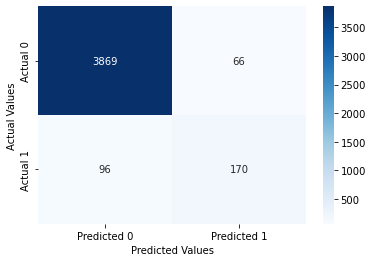

In [32]:
confusion_matrix_data(test_data,test_data.AS,logit_model_including_all,CUTOFF)

Model Improvement (Variable Selection Methods to increase interpretability) 

In [33]:
predictors

,Age,Pos,Tm,G,GS,MP,FG,FGA,FGP,three_P,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
712,24,PG,50,50,0,15.9,2.300000,6.400000,0.356000,0.800000,...,0.667000,0.300000,1.100000,1.400000,2.200000,0.600000,0.000000,1.100000,1.200000,6.500000
713,26,PG,59,118,24,64.6,3.694068,9.929661,0.378297,1.194068,...,0.884822,0.321186,0.994068,1.315254,3.934746,0.578814,0.078814,1.692373,1.907627,10.726271
714,26,PG,51,102,0,38.5,1.616667,3.630392,0.417676,0.128431,...,0.729353,0.210784,1.006863,1.217647,1.646078,0.617647,0.000000,0.810784,1.206863,4.218627
715,30,PF,73,73,3,22.8,3.800000,9.200000,0.416000,1.600000,...,0.735000,1.000000,3.500000,4.500000,1.400000,0.500000,0.100000,1.500000,2.800000,10.500000
716,27,PF,71,142,46,55.6,2.876056,6.090141,0.476444,0.084507,...,0.777155,0.788028,2.184507,3.007042,0.872535,0.503521,0.184507,0.900000,2.003521,7.390141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,30,C,54,54,54,30.4,5.200000,7.700000,0.675000,0.000000,...,0.661000,3.200000,8.400000,11.600000,0.900000,0.800000,1.400000,1.700000,3.000000,13.600000
6296,34,PG,39,39,39,34.5,9.700000,19.800000,0.493000,4.900000,...,0.925000,0.600000,5.700000,6.200000,6.400000,1.000000,0.400000,3.200000,2.200000,29.400000
6297,24,PG,57,57,57,35.1,8.400000,19.600000,0.426000,2.100000,...,0.890000,0.800000,2.300000,3.000000,10.100000,1.100000,0.200000,4.100000,1.500000,26.700000
6298,27,SG,61,61,61,36.0,8.500000,17.900000,0.477000,2.800000,...,0.844000,0.500000,4.200000,4.700000,4.000000,0.900000,0.200000,2.600000,2.200000,24.700000


In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_predictors = predictors.select_dtypes(include=numerics)
numeric_predictors

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
712,24,50,50,0,15.9,2.300000,6.400000,0.356000,0.800000,3.000000,...,0.667000,0.300000,1.100000,1.400000,2.200000,0.600000,0.000000,1.100000,1.200000,6.500000
713,26,59,118,24,64.6,3.694068,9.929661,0.378297,1.194068,4.012712,...,0.884822,0.321186,0.994068,1.315254,3.934746,0.578814,0.078814,1.692373,1.907627,10.726271
714,26,51,102,0,38.5,1.616667,3.630392,0.417676,0.128431,0.717647,...,0.729353,0.210784,1.006863,1.217647,1.646078,0.617647,0.000000,0.810784,1.206863,4.218627
715,30,73,73,3,22.8,3.800000,9.200000,0.416000,1.600000,4.500000,...,0.735000,1.000000,3.500000,4.500000,1.400000,0.500000,0.100000,1.500000,2.800000,10.500000
716,27,71,142,46,55.6,2.876056,6.090141,0.476444,0.084507,0.372535,...,0.777155,0.788028,2.184507,3.007042,0.872535,0.503521,0.184507,0.900000,2.003521,7.390141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,30,54,54,54,30.4,5.200000,7.700000,0.675000,0.000000,0.100000,...,0.661000,3.200000,8.400000,11.600000,0.900000,0.800000,1.400000,1.700000,3.000000,13.600000
6296,34,39,39,39,34.5,9.700000,19.800000,0.493000,4.900000,11.400000,...,0.925000,0.600000,5.700000,6.200000,6.400000,1.000000,0.400000,3.200000,2.200000,29.400000
6297,24,57,57,57,35.1,8.400000,19.600000,0.426000,2.100000,6.600000,...,0.890000,0.800000,2.300000,3.000000,10.100000,1.100000,0.200000,4.100000,1.500000,26.700000
6298,27,61,61,61,36.0,8.500000,17.900000,0.477000,2.800000,7.300000,...,0.844000,0.500000,4.200000,4.700000,4.000000,0.900000,0.200000,2.600000,2.200000,24.700000


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numeric_predictors = add_constant(numeric_predictors)
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_predictors.columns

for i in range(len(numeric_predictors.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(numeric_predictors.values, i)
sorted_vif = vif_data.sort_values(by="VIF", ascending=False)
print(sorted_vif)

sorted_vif[sorted_vif["VIF"] > 10]

     feature          VIF
7        FGA  9742.330968
27       PTS  7622.005192
13    two_PA  6005.871596
6         FG  5217.860025
21       TRB  2677.318518
12     two_P  1972.816850
10  three_PA  1911.777348
20       DRB  1475.669776
9    three_P   528.735765
16        FT   485.581277
19       ORB   273.911444
0      const   194.012921
17       FTA    79.254538
8        FGP    22.721882
3          G    20.226508
15      eFGP    18.247970
2         Tm    13.774307
5         MP    11.448706
25       TOV     8.419602
14    two_PP     5.193705
22       AST     4.753050
4         GS     3.276990
26        PF     2.822897
23       STL     2.372294
24       BLK     2.280813
11  three_PP     2.021614
18       FTP     1.868164
1        Age     1.095331


,feature,VIF
7,FGA,9742.330968
27,PTS,7622.005192
13,two_PA,6005.871596
6,FG,5217.860025
21,TRB,2677.318518
12,two_P,1972.816850
10,three_PA,1911.777348
20,DRB,1475.669776
9,three_P,528.735765
16,FT,485.581277


Small VIF values, VIF < 3, indicate low correlation among variables under ideal conditions. The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. However, note that many sources say that a VIF of less than 10 is acceptable.

FGA, PTS, two_PA, FG, TRB, two_P, three_PA, DRB all have VIF values greater than 1000 meaning that these variables are perfectly correlated with each other (perfect multicollinearity). We shouldn't have all of these variables included in the model at the same time. Having them all included in the model won't increase accuracy by much and in fact decrease interpretability and lead to incorrect inferences of the model.

Using Forward Selection

In [36]:
X = predictors.drop(["Pos"], axis=1)
X

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
712,24,50,50,0,15.9,2.300000,6.400000,0.356000,0.800000,3.000000,...,0.667000,0.300000,1.100000,1.400000,2.200000,0.600000,0.000000,1.100000,1.200000,6.500000
713,26,59,118,24,64.6,3.694068,9.929661,0.378297,1.194068,4.012712,...,0.884822,0.321186,0.994068,1.315254,3.934746,0.578814,0.078814,1.692373,1.907627,10.726271
714,26,51,102,0,38.5,1.616667,3.630392,0.417676,0.128431,0.717647,...,0.729353,0.210784,1.006863,1.217647,1.646078,0.617647,0.000000,0.810784,1.206863,4.218627
715,30,73,73,3,22.8,3.800000,9.200000,0.416000,1.600000,4.500000,...,0.735000,1.000000,3.500000,4.500000,1.400000,0.500000,0.100000,1.500000,2.800000,10.500000
716,27,71,142,46,55.6,2.876056,6.090141,0.476444,0.084507,0.372535,...,0.777155,0.788028,2.184507,3.007042,0.872535,0.503521,0.184507,0.900000,2.003521,7.390141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,30,54,54,54,30.4,5.200000,7.700000,0.675000,0.000000,0.100000,...,0.661000,3.200000,8.400000,11.600000,0.900000,0.800000,1.400000,1.700000,3.000000,13.600000
6296,34,39,39,39,34.5,9.700000,19.800000,0.493000,4.900000,11.400000,...,0.925000,0.600000,5.700000,6.200000,6.400000,1.000000,0.400000,3.200000,2.200000,29.400000
6297,24,57,57,57,35.1,8.400000,19.600000,0.426000,2.100000,6.600000,...,0.890000,0.800000,2.300000,3.000000,10.100000,1.100000,0.200000,4.100000,1.500000,26.700000
6298,27,61,61,61,36.0,8.500000,17.900000,0.477000,2.800000,7.300000,...,0.844000,0.500000,4.200000,4.700000,4.000000,0.900000,0.200000,2.600000,2.200000,24.700000


In [37]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('AS~' + '+'.join(predictor_subset),data = train_data).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [38]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [39]:
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
# models_best = pd.DataFrame(columns=["Rsquared", "model"])

# tic = time.time()
# for i in range(1,1+X.shape[1]):
#     models_best.loc[i] = getBest_model(i)

# toc = time.time()
# print("Total elapsed time:", (toc-tic), "seconds.")

In [40]:
def best_sub_plots(models_best):
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')
    print("RSADJ.ARGMIN + 1, RSADJ.MIN: ", 1+rsquared_adj.argmax(), rsquared_adj.max() )

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')
    print("AIC.ARGMIN + 1, AIC.MIN: ", 1+aic.argmin(), aic.min() )

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
    print("BIC.ARGMIN + 1, BIC.MIN: ", 1+bic.argmin(), bic.min() )
# best_sub_plots()

In [41]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [42]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [43]:
models_best_fw = forward_selection()

Processed  27 models on 1 predictors in 0.07145810127258301 seconds.
Processed  26 models on 2 predictors in 0.08432841300964355 seconds.
Processed  25 models on 3 predictors in 0.09164261817932129 seconds.
Processed  24 models on 4 predictors in 0.11073946952819824 seconds.
Processed  23 models on 5 predictors in 0.11911177635192871 seconds.
Processed  22 models on 6 predictors in 0.1381819248199463 seconds.
Processed  21 models on 7 predictors in 0.13817930221557617 seconds.
Processed  20 models on 8 predictors in 0.1472160816192627 seconds.
Processed  19 models on 9 predictors in 0.14653372764587402 seconds.
Processed  18 models on 10 predictors in 0.15310430526733398 seconds.
Processed  17 models on 11 predictors in 0.14861440658569336 seconds.
Processed  16 models on 12 predictors in 0.2063610553741455 seconds.
Processed  15 models on 13 predictors in 0.15207409858703613 seconds.
Processed  14 models on 14 predictors in 0.14903664588928223 seconds.
Processed  13 models on 15 predi

the lower the AIC/BIC value, the better fitting model

RSADJ.ARGMIN + 1, RSADJ.MIN:  22 0.4432155772041354
AIC.ARGMIN + 1, AIC.MIN:  16 -1318.48285123787
BIC.ARGMIN + 1, BIC.MIN:  10 -1232.5939418481694


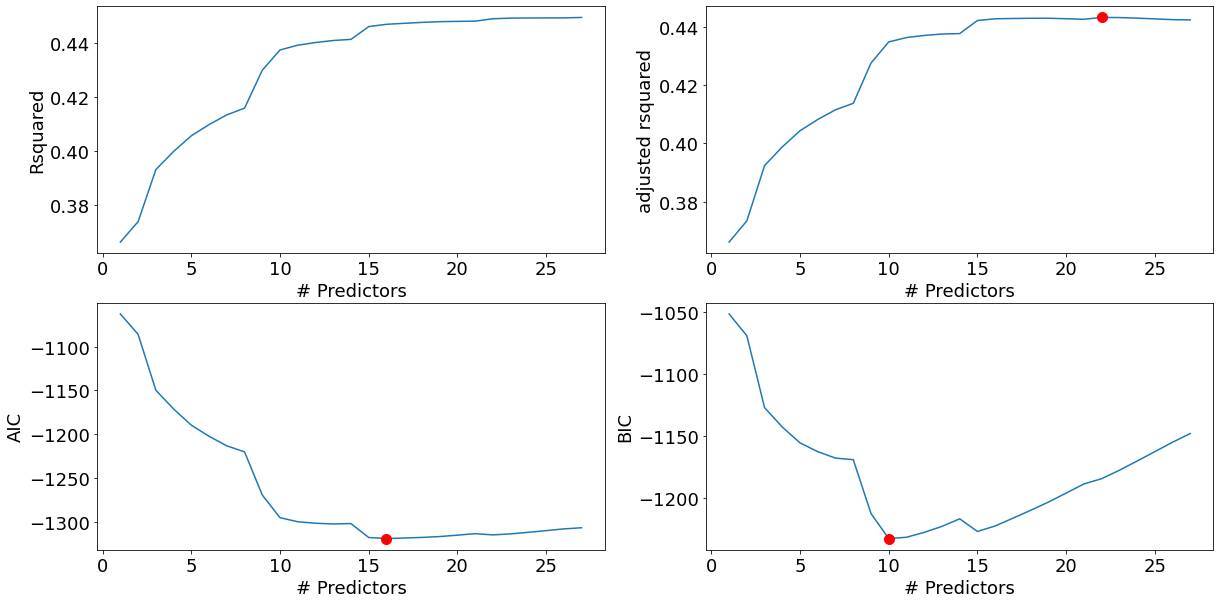

In [44]:
best_sub_plots(models_best_fw)

The model with 9 predictors is the best model based on the AIC criterion, and very close to the best model based on the BIC and adjusted R-squared criteria. Let us select the model with 9 predictors.

In [45]:
best_fwd_reg_model = models_best_fw['model'][9]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AS   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          1.73e-247
Time:                        03:47:26   Log-Likelihood:                 644.46
No. Observations:                2099   AIC:                            -1269.
Df Residuals:                    2089   BIC:                            -1212.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0487      0.026      1.897      0.058      -0.002       0.099
FT             0.0886      0.005     17.170      0.000       0.079       0.099
PF            -0.0478      0.008     -6.091      0.000      -0.063      -0.032
DRB            0.0412      0.005      8.920      0.000       0.032       0.050
ORB           -0.0693      0.009     -7.317      0.000      -0.088      -0.051
MP            -0.0010      0.000     -3.551      0.000      -0.002      -0.000
AST            0.0139      0.003      4.644      0.000       0.008       0.020
FTP           -0.0978      0.033     -2.976      0.003      -0.162      -0.033
FGA           -0.0392      0.005     -7.780      0.000      -0.049      -0.029
FG             0.0781      0.011      7.173      0.000       0.057       0.099
==============================================================================
Omnibus:                      812.705   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5282.459
Skew:                           1.682   Prob(JB):                         0.00
Kurtosis:                      10.006   Cond. No.                         337.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# confusion_matrix_data(train_data,train_data.AS,best_fwd_reg_model,CUTOFF)

In [47]:
# confusion_matrix_data(test_data,test_data.AS,best_fwd_reg_model,CUTOFF)

Classification accuracy = 96.0%
Precision = 66.7%
TPR or Recall = 66.7%
FNR = 33.3%
FPR = 2.1%
ROC-AUC = 82.3%


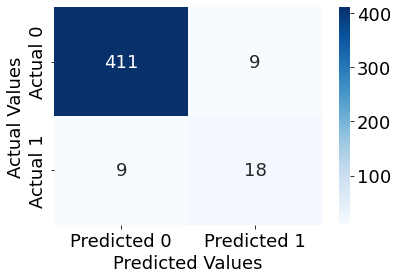

In [48]:
confusion_matrix_year(best_fwd_reg_model, test_2023, true_2023_as_count)

In [49]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [50]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [51]:
models_best_bw = backward_selection()

Processed  27 models on 26 predictors in 0.6004016399383545 seconds.
Processed  26 models on 25 predictors in 0.49214720726013184 seconds.
Processed  25 models on 24 predictors in 0.47355079650878906 seconds.
Processed  24 models on 23 predictors in 0.42378902435302734 seconds.
Processed  23 models on 22 predictors in 0.3722710609436035 seconds.
Processed  22 models on 21 predictors in 0.3477914333343506 seconds.
Processed  21 models on 20 predictors in 0.3570518493652344 seconds.
Processed  20 models on 19 predictors in 0.27601075172424316 seconds.
Processed  19 models on 18 predictors in 0.2602260112762451 seconds.
Processed  18 models on 17 predictors in 0.24393463134765625 seconds.
Processed  17 models on 16 predictors in 0.22192597389221191 seconds.
Processed  16 models on 15 predictors in 0.18235325813293457 seconds.
Processed  15 models on 14 predictors in 0.1639406681060791 seconds.
Processed  14 models on 13 predictors in 0.139998197555542 seconds.
Processed  13 models on 12 p

RSADJ.ARGMIN + 1, RSADJ.MIN:  20 0.44374752618092483
AIC.ARGMIN + 1, AIC.MIN:  17 -1320.317362278678
BIC.ARGMIN + 1, BIC.MIN:  14 -1230.5611629372515


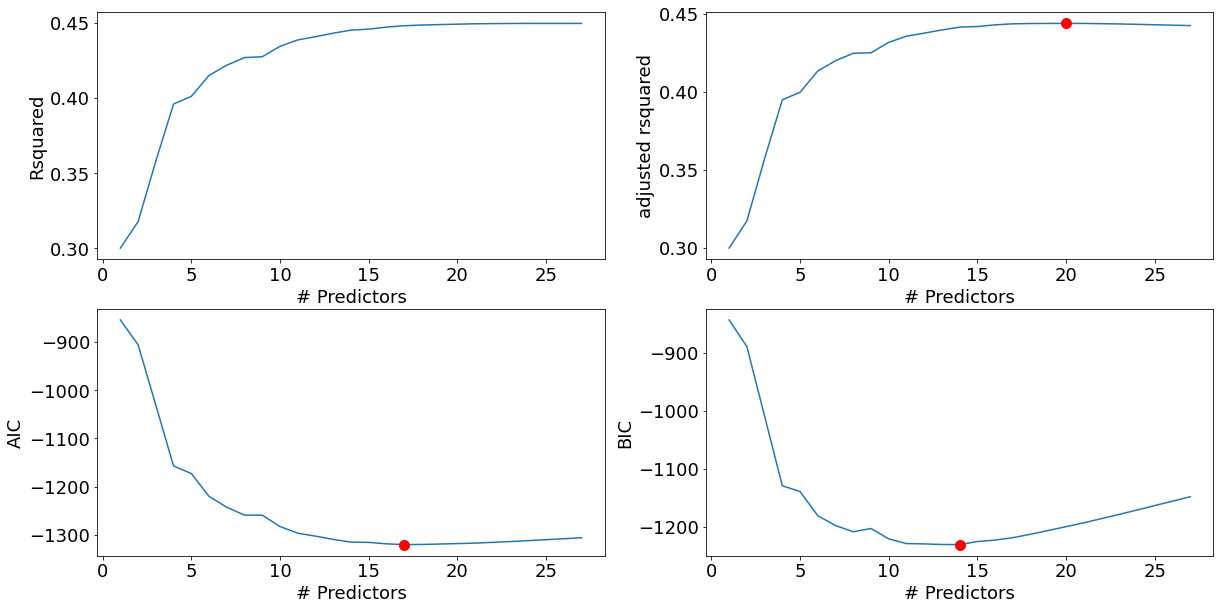

In [52]:
best_sub_plots(models_best_bw)

In [53]:
best_bwd_reg_model = models_best_bw['model'][19]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AS   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     89.08
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          5.50e-252
Time:                        03:47:31   Log-Likelihood:                 679.62
No. Observations:                2099   AIC:                            -1319.
Df Residuals:                    2079   BIC:                            -1206.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2433      0.053      4.573      0.000       0.139       0.348
Age            0.0010      0.001      1.080      0.280      -0.001       0.003
Tm            -0.0030      0.001     -4.595      0.000      -0.004      -0.002
G              0.0028      0.001      4.746      0.000       0.002       0.004
GS             0.0006      0.000      2.618      0.009       0.000       0.001
MP            -0.0046      0.001     -5.940      0.000      -0.006      -0.003
FGP           -0.6576      0.192     -3.420      0.001      -1.035      -0.281
three_P       -0.2626      0.067     -3.928      0.000      -0.394      -0.132
three_PA      -0.0595      0.013     -4.673      0.000      -0.084      -0.035
two_P         -0.1167      0.041     -2.836      0.005      -0.197      -0.036
two_PA        -0.0685      0.008     -8.284      0.000      -0.085      -0.052
eFGP           0.2339      0.183      1.277      0.202      -0.125       0.593
FTA           -0.0376      0.016     -2.327      0.020      -0.069      -0.006
FTP           -0.1440      0.038     -3.762      0.000      -0.219      -0.069
ORB           -0.0885      0.014     -6.529      0.000      -0.115      -0.062
TRB            0.0371      0.005      7.732      0.000       0.028       0.047
AST            0.0145      0.003      4.377      0.000       0.008       0.021
STL            0.0273      0.015      1.881      0.060      -0.001       0.056
PF            -0.0358      0.008     -4.295      0.000      -0.052      -0.019
PTS            0.1316      0.020      6.696      0.000       0.093       0.170
==============================================================================
Omnibus:                      790.765   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5466.349
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      10.223   Cond. No.                     6.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = 93.8%
Precision = 73.6%
TPR or Recall = 63.9%
FNR = 36.1%
FPR = 2.7%
ROC-AUC = 97.5%


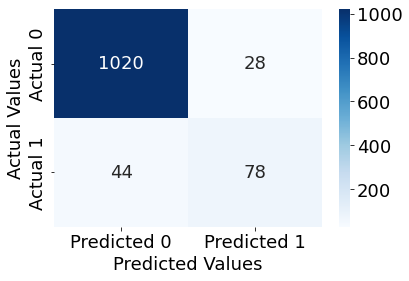

In [54]:
confusion_matrix_data(train_data,train_data.AS,best_bwd_reg_model,CUTOFF)

Classification accuracy = 92.8%
Precision = 81.1%
TPR or Recall = 48.7%
FNR = 51.3%
FPR = 1.5%
ROC-AUC = 96.9%


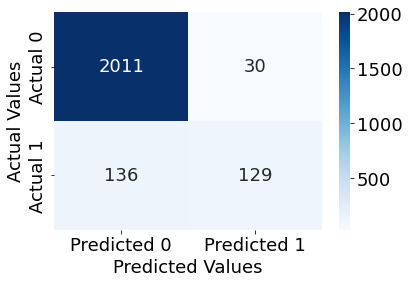

In [55]:
confusion_matrix_data(test_data,test_data.AS,best_bwd_reg_model,CUTOFF)

Classification accuracy = 96.4%
Precision = 70.4%
TPR or Recall = 70.4%
FNR = 29.6%
FPR = 1.9%
ROC-AUC = 84.2%


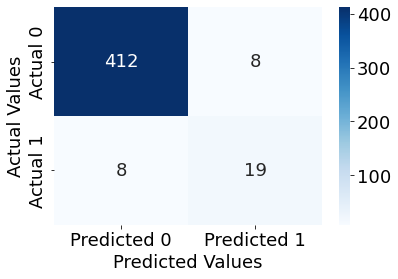

In [56]:
confusion_matrix_year(best_bwd_reg_model, test_2023, true_2023_as_count)

In [57]:
#Create 2*2 Subplot for all_var, forward_one, forward_two, backward



In [58]:
sorted_vif[sorted_vif["VIF"] > 10]

,feature,VIF
7,FGA,9742.330968
27,PTS,7622.005192
13,two_PA,6005.871596
6,FG,5217.860025
21,TRB,2677.318518
12,two_P,1972.816850
10,three_PA,1911.777348
20,DRB,1475.669776
9,three_P,528.735765
16,FT,485.581277


in case of determining players that make it to the all stars, false negatives are more concerning than false positives. This is because if a person has diabetes, and is told that they do not have diabetes, their condition may deteriorate. If a person does not have diabetes, and is told that they have diabetes, they may take unnecessary precautions or tests, but it will not be as harmful to the person as in the previous case. So, in this problem, we will be more focused on reducing the number of false negatives, instead of reducing the false positives or increasing the overall classification accuracy.

We can decrease the cutoff for classifying a person as having diabetes to reduce the number of false negatives.

Note that the changed cut-off reduced the number of false negatives, but at the cost of increasing the false positives. However, the stakeholders may prefer the reduced cut-off to be safer.

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc




def confusion_matrix_multi(model_list, label_list, test_ds, as_count):
    fig, axs = plt.subplots(2, 2, figsize=(24, 20))
    plt.subplots_adjust(hspace  = 0.6)
    axs = axs.ravel()
    
    for i, model in enumerate(model_list):
        # Assume new_data is a dataframe containing the predictor variables for the new observations
        pred_probs = model.predict(test_ds)  # Predict the probabilities of AS=1 for each observation
        pred_probs_sorted = pred_probs.sort_values(ascending=False)  # Sort the probabilities in descending order
        top_indices = pred_probs_sorted.head(as_count).index  # Get the indices of the top n observations with the highest probabilities
        predicted_classes = pd.Series(0, index=test_ds.index)  # Create a Series to store the predicted classes (0 or 1) for each observation
        predicted_classes.loc[top_indices] = 1  # Set the top n predicted classes to 1, and the rest to 0
        true_values = test_ds['AS']
        confusion = pd.DataFrame(confusion_matrix(true_values, predicted_classes))
        confusion.columns = ['Predicted 0', 'Predicted 1']
        confusion = confusion.rename(index={0: 'Actual 0',1: 'Actual 1'})
        cm = np.array(confusion)
        # Calculate the performance metrics
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
        precision = (cm[1,1])/(cm[0,1]+cm[1,1])
        fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
        tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
        fpr_roc, tpr_roc, auc_thresholds = roc_curve(true_values, predicted_classes)
        auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
        # Create the heatmap of the confusion matrix
        sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', ax=axs[i])
        axs[i].set_ylabel("Actual Values")
        axs[i].set_xlabel("Predicted Values")
        axs[i].set_title(label_list[i])
        # Print the performance metrics
        axs[i].text(0, 1.35, "Classification accuracy = {:.1%}".format(accuracy), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.3, "Precision = {:.1%}".format(precision), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.25, "TPR or Recall = {:.1%}".format(tpr), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.2, "FNR = {:.1%}".format(fnr), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.15, "FPR = {:.1%}".format(fpr), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.1, "ROC-AUC = {:.1%}".format(auc_value), horizontalalignment='left', transform=axs[i].transAxes)


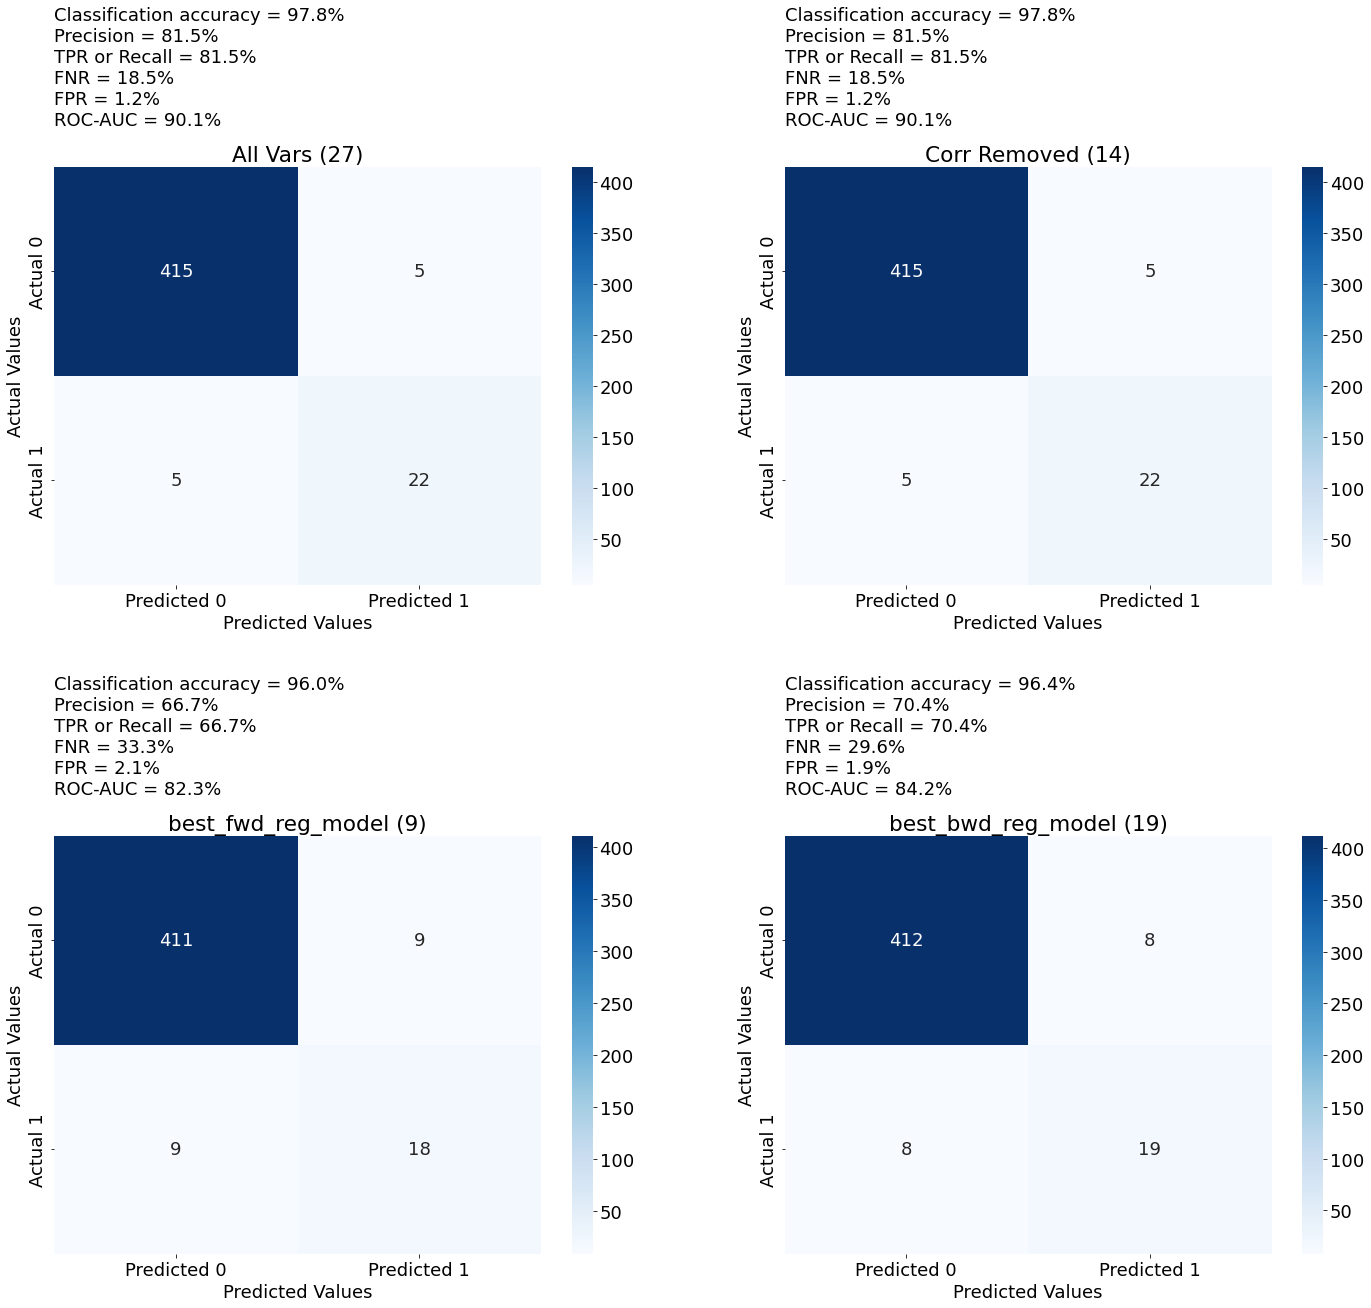

In [60]:
model_list = [logit_model_including_all, logit_model_less_corr, best_fwd_reg_model, best_bwd_reg_model]
label_list = ["All Vars (27)", "Corr Removed (14)", "best_fwd_reg_model (9)", "best_bwd_reg_model (19)"]
confusion_matrix_multi(model_list, label_list, test_2023, true_2023_as_count)

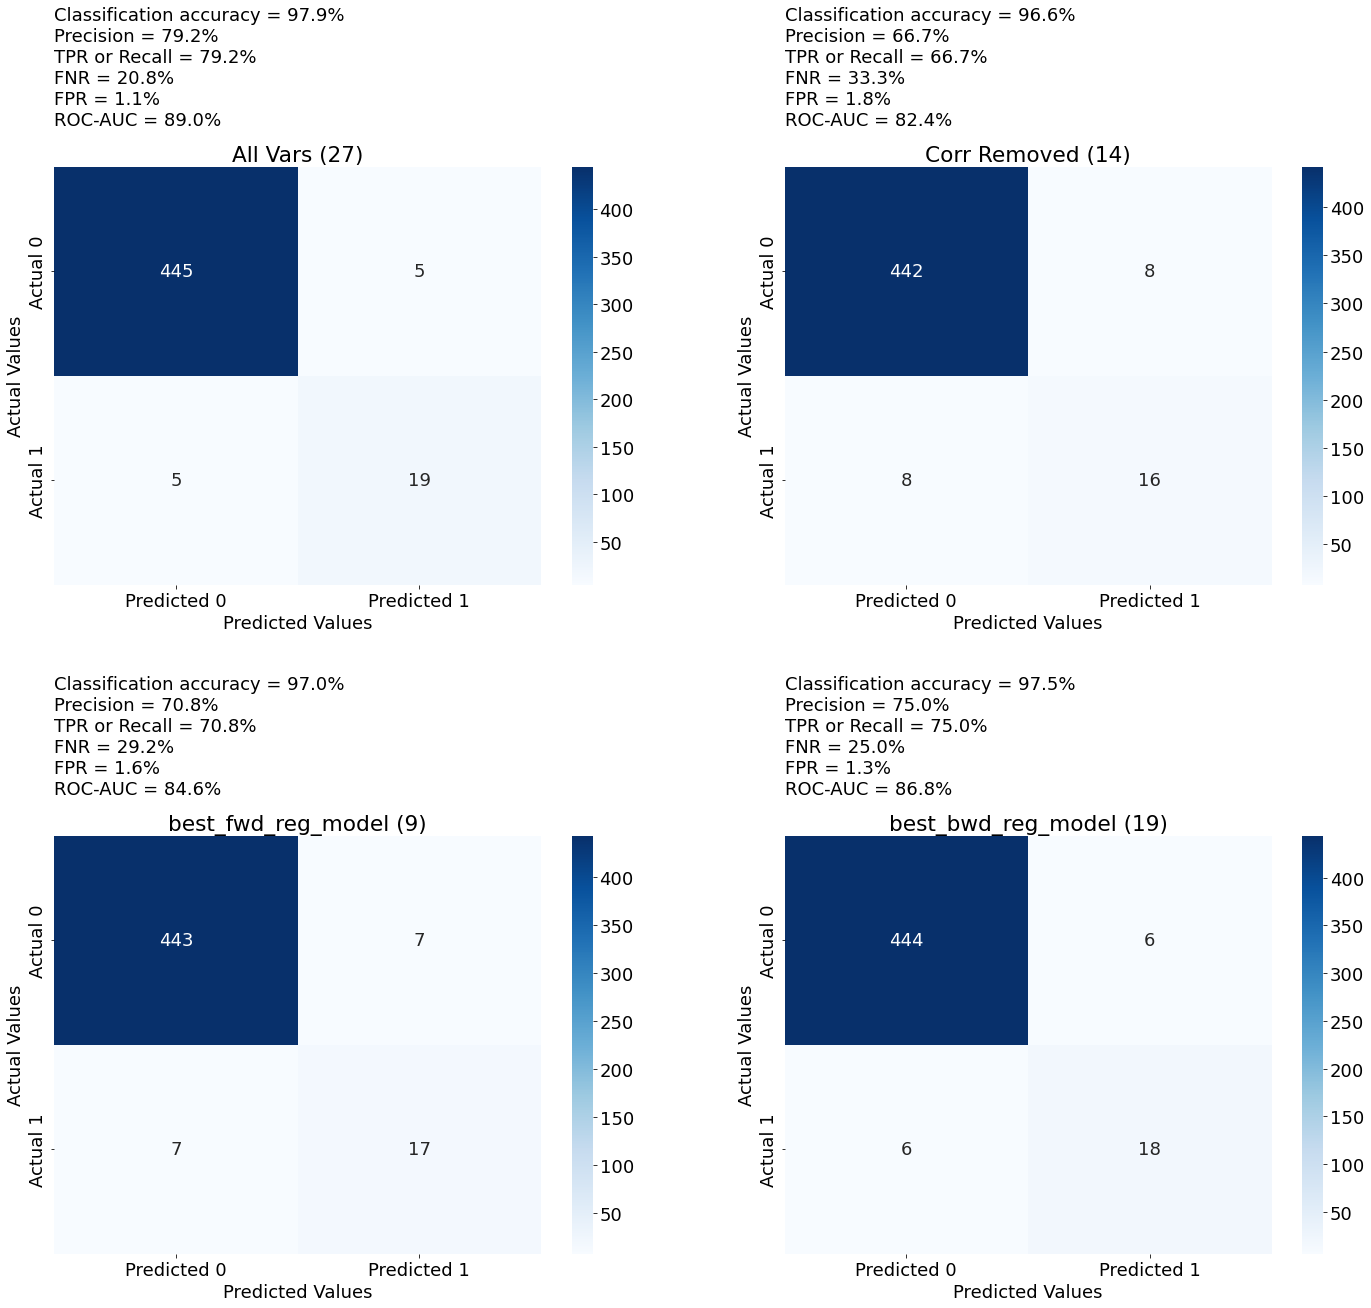

In [61]:
confusion_matrix_multi(model_list, label_list, test_2020, true_2020_as_count)

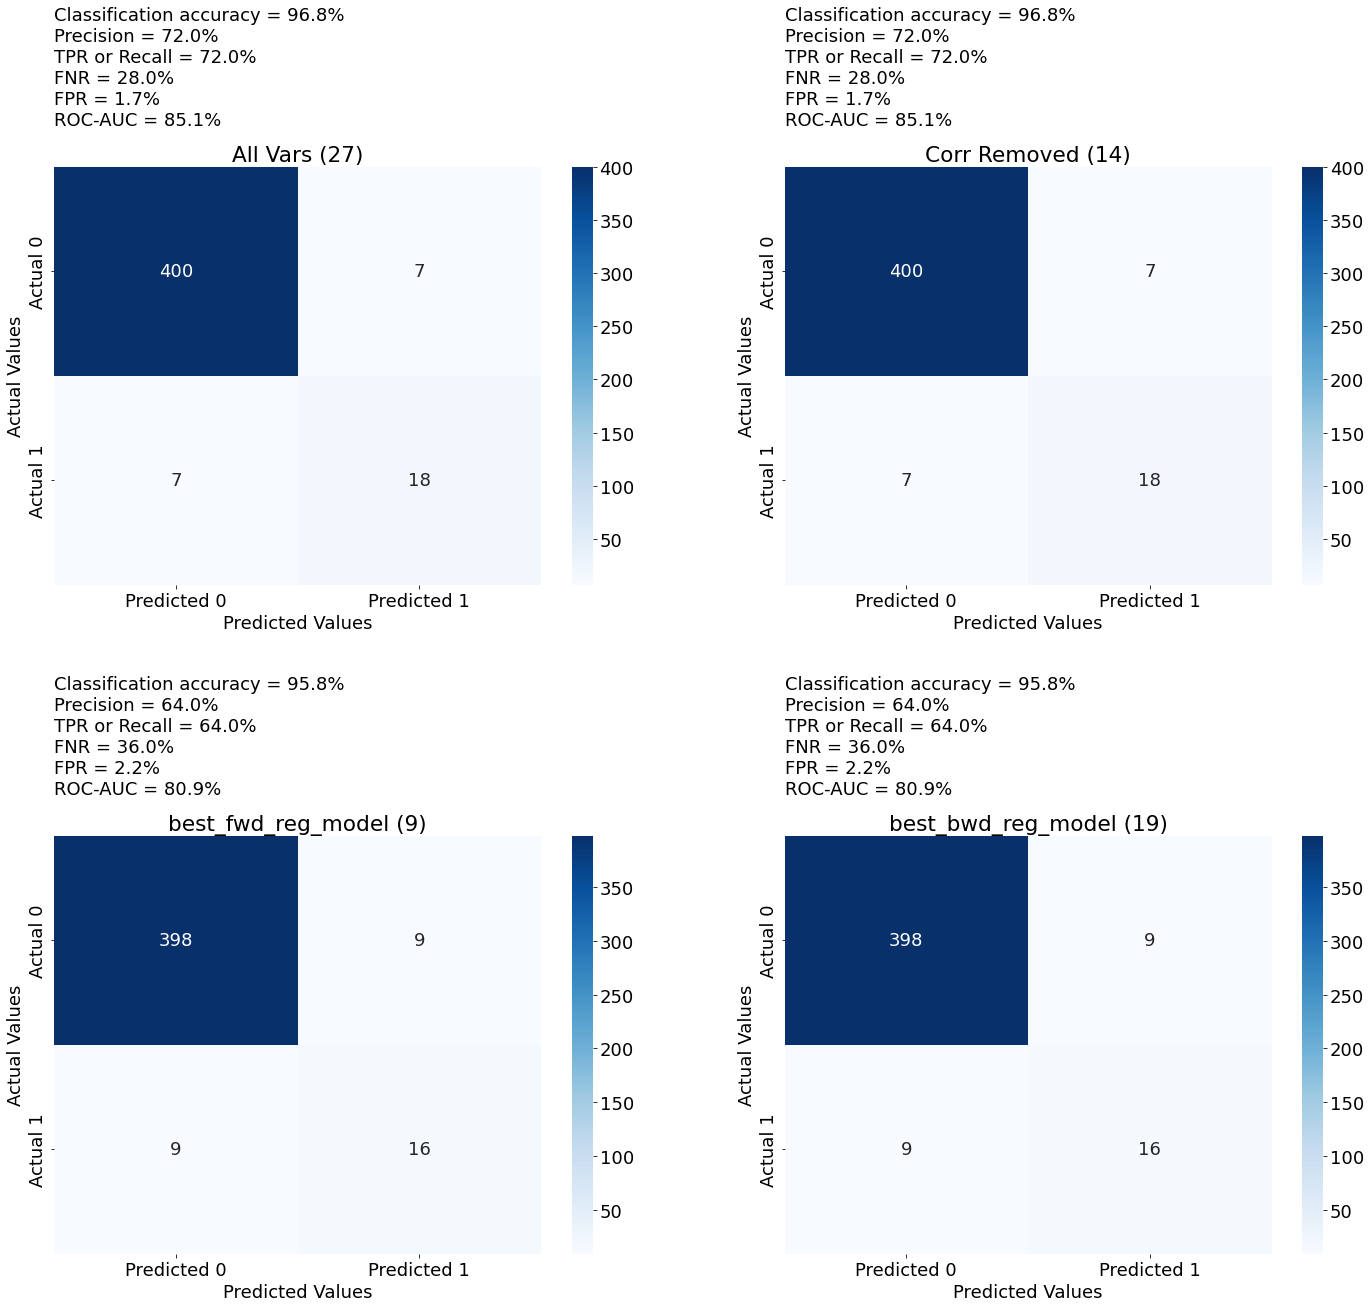

In [62]:
confusion_matrix_multi(model_list, label_list, test_2017, true_2017_as_count)

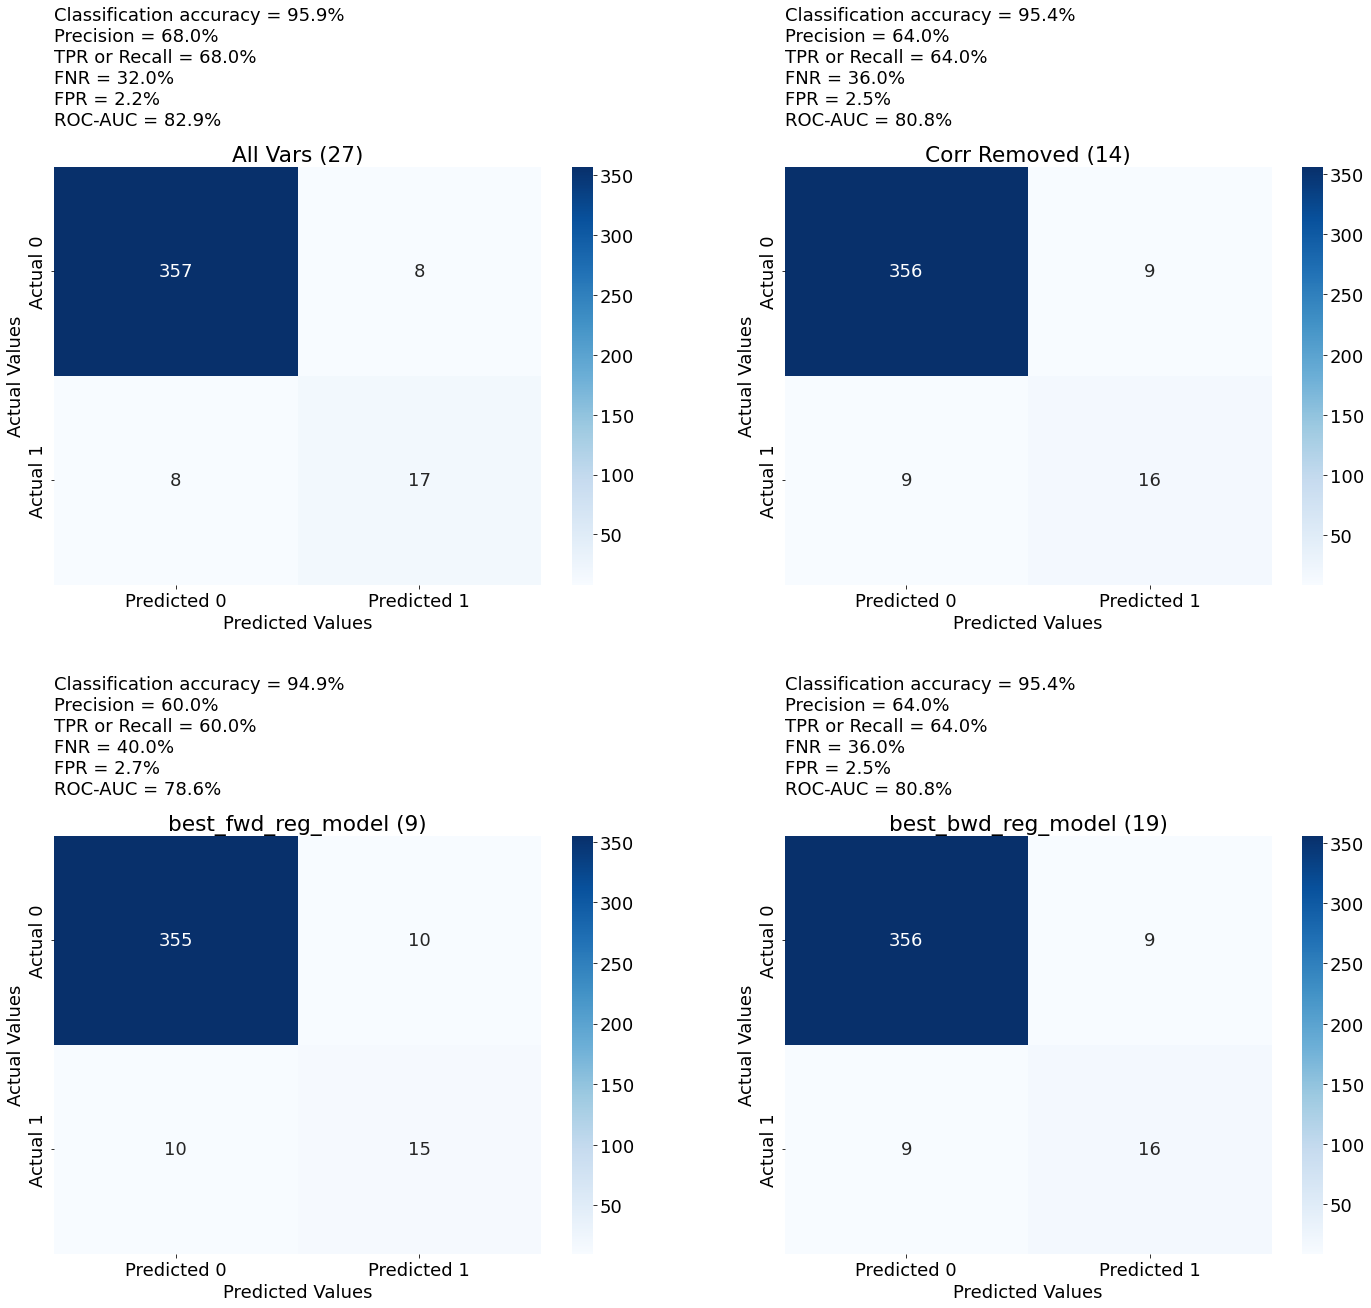

In [63]:
confusion_matrix_multi(model_list, label_list, test_2014, true_2014_as_count)

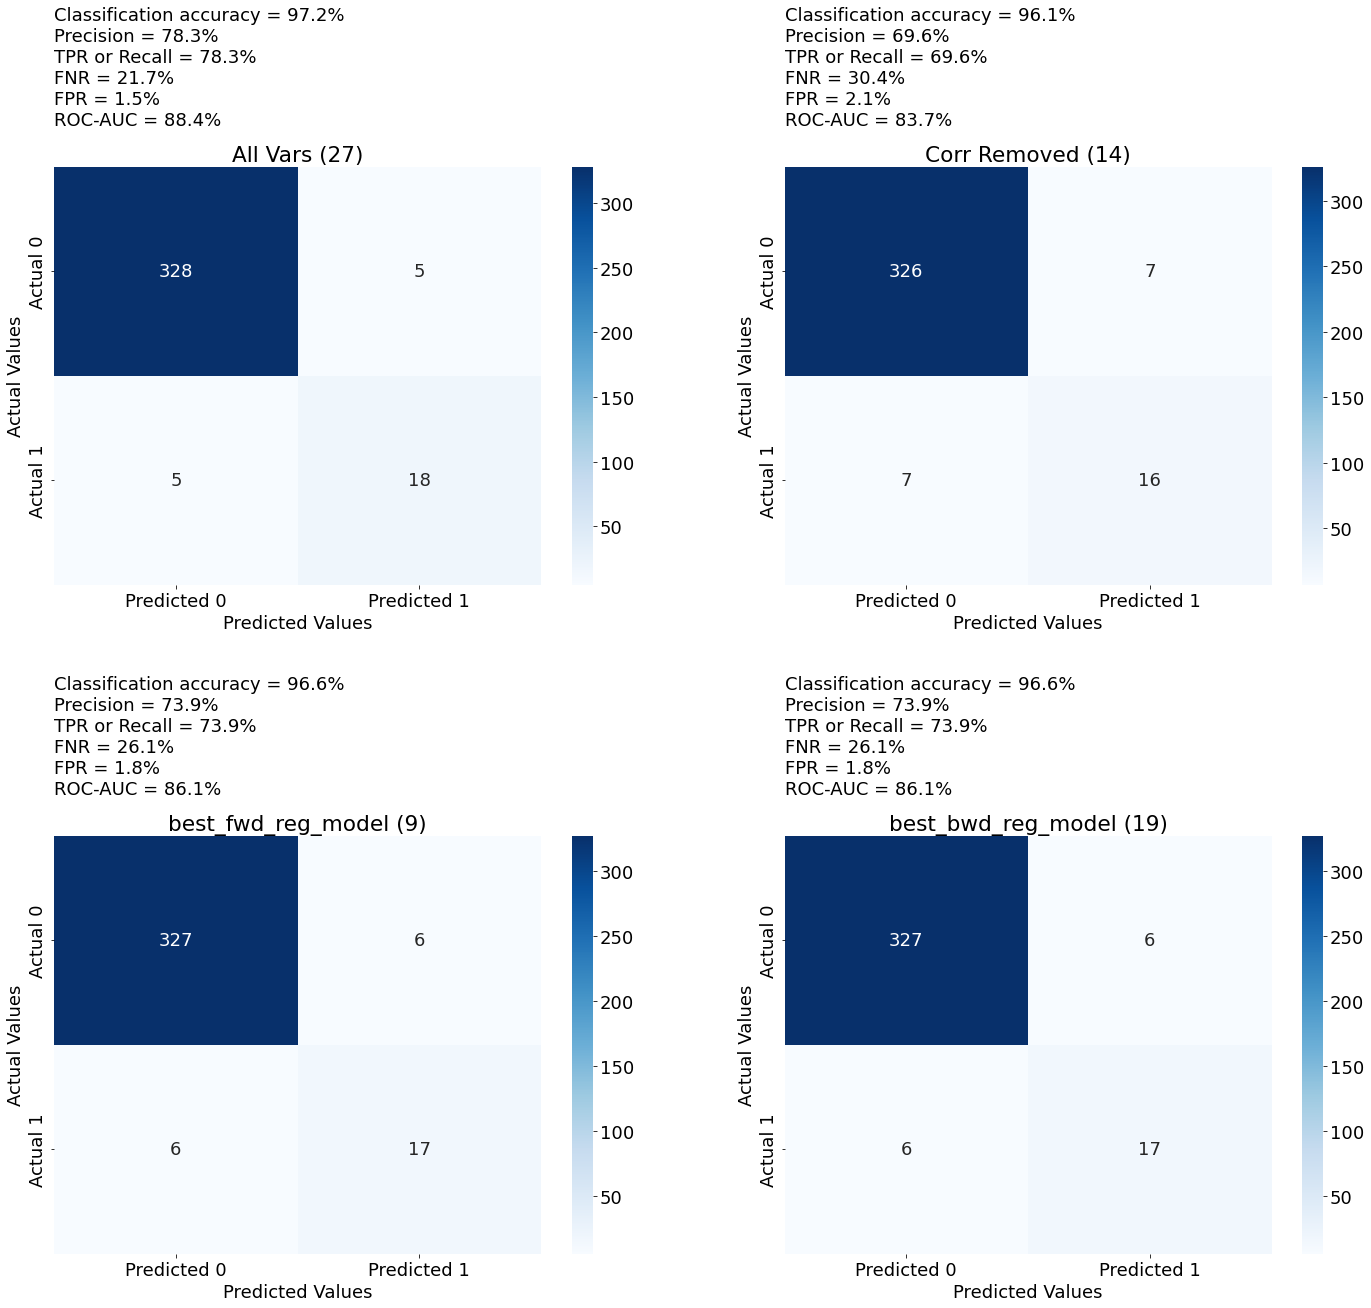

In [64]:
confusion_matrix_multi(model_list, label_list, test_2011, true_2011_as_count)

In [68]:
# Complete Data for 2023
def get_result(data, count):
    pred_probs = logit_model_including_all.predict(data)  # Predict the probabilities of AS=1 for each observation
    pred_probs_sorted = pred_probs.sort_values(ascending=False)  # Sort the probabilities in descending order
    top_indices = pred_probs_sorted.head(count).index  # Get the indices of the top n observations with the highest probabilities
    predicted_classes = pd.Series(0, index=data.index)  # Create a Series to store the predicted classes (0 or 1) for each observation
    predicted_classes.loc[top_indices] = 1
    data["Predicted_AS"] = predicted_classes

    correct_prediction = data[(data['AS'] == 1) & (data['Predicted_AS'] == 1)]['Player']
    false_positives = data[(data['AS'] == 0) & (data['Predicted_AS'] == 1)]['Player']
    false_negatives = data[(data['AS'] == 1) & (data['Predicted_AS'] == 0)]['Player']
    print("Correct: \n", correct_prediction)
    print("FP: \n", false_positives)
    print("FN: \n", false_negatives)

get_result(test_2023, true_2023_as_count)

Correct: 
 5872            Anthony Edwards
5928             Damian Lillard
5940               De'Aaron Fox
5958           Domantas Sabonis
5960           Donovan Mitchell
6041               Jaylen Brown
6079              Julius Randle
6116               Kyrie Irving
6120            Lauri Markkanen
6186                Paul George
6218    Shai Gilgeous-Alexander
6255          Tyrese Haliburton
6278              DeMar DeRozan
6282      Giannis Antetokounmpo
6283                  Ja Morant
6285               Jayson Tatum
6287                Joel Embiid
6289               Kevin Durant
6292               LeBron James
6293                Luka Doncic
6294               Nikola Jokic
6296              Stephen Curry
Name: Player, dtype: object
FP: 
 5871     Anthony Davis
6032      James Harden
6166    Nikola Vucevic
6297        Trae Young
6298       Zach LaVine
Name: Player, dtype: object
FN: 
 5878          Bam Adebayo
6035    Jaren Jackson Jr.
6077         Jrue Holiday
6180        Pascal Siaka

C:\Users\msbow\AppData\Local\Temp\ipykernel_16372\1552559992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Predicted_AS"] = predicted_classes


In [70]:
get_result(test_2020, true_2020_as_count)

Correct: 
 4844            Anthony Davis
4845              Bam Adebayo
4846              Ben Simmons
4847           Brandon Ingram
4848               Chris Paul
4849           Damian Lillard
4850             Devin Booker
4853    Giannis Antetokounmpo
4854             James Harden
4855             Jayson Tatum
4856             Jimmy Butler
4857              Joel Embiid
4858            Kawhi Leonard
4862             LeBron James
4863              Luka Doncic
4864             Nikola Jokic
4865            Pascal Siakam
4866        Russell Westbrook
4867               Trae Young
Name: Player, dtype: object
FP: 
 4430          Bradley Beal
4488         DeMar DeRozan
4637    Karl-Anthony Towns
4649            Kevin Love
4841           Zach LaVine
Name: Player, dtype: object
FN: 
 4851    Domantas Sabonis
4852    Donovan Mitchell
4859        Kemba Walker
4860     Khris Middleton
4861          Kyle Lowry
Name: Player, dtype: object


C:\Users\msbow\AppData\Local\Temp\ipykernel_16372\1552559992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Predicted_AS"] = predicted_classes


In [71]:
get_result(test_2017, true_2017_as_count)

Correct: 
 3454            Anthony Davis
3457            DeMar DeRozan
3458         DeMarcus Cousins
3460    Giannis Antetokounmpo
3462            Isaiah Thomas
3463             James Harden
3464             Jimmy Butler
3465                John Wall
3466            Kawhi Leonard
3467             Kemba Walker
3468             Kevin Durant
3471               Kyle Lowry
3472             Kyrie Irving
3473             LeBron James
3474               Marc Gasol
3475              Paul George
3477        Russell Westbrook
3478            Stephen Curry
Name: Player, dtype: object
FP: 
 3080         Blake Griffin
3107            Chris Paul
3116        Damian Lillard
3158          Eric Bledsoe
3214           Jeff Teague
3254    Karl-Anthony Towns
3376           Rudy Gobert
Name: Player, dtype: object
FN: 
 3455    Carmelo Anthony
3456     DeAndre Jordan
3459     Draymond Green
3461     Gordon Hayward
3469         Kevin Love
3470      Klay Thompson
3476       Paul Millsap
Name: Player, dtype: obj

C:\Users\msbow\AppData\Local\Temp\ipykernel_16372\1552559992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Predicted_AS"] = predicted_classes


In [72]:
get_result(test_2014, true_2014_as_count)

Correct: 
 2209        Anthony Davis
2210        Blake Griffin
2211      Carmelo Anthony
2213           Chris Paul
2215        DeMar DeRozan
2216        Dirk Nowitzki
2217        Dwight Howard
2219         James Harden
2220          Joakim Noah
2222            John Wall
2223         Kevin Durant
2224           Kevin Love
2227    LaMarcus Aldridge
2228         LeBron James
2229          Paul George
2230         Paul Millsap
2232        Stephen Curry
Name: Player, dtype: object
FP: 
 1848         Al Jefferson
1925           David West
1927     DeMarcus Cousins
2068        Marcin Gortat
2096          Monta Ellis
2146    Russell Westbrook
2174           Tim Duncan
2188            Ty Lawson
Name: Player, dtype: object
FN: 
 2212        Chris Bosh
2214    Damian Lillard
2218       Dwyane Wade
2221       Joe Johnson
2225       Kobe Bryant
2226      Kyrie Irving
2231       Roy Hibbert
2233       Tony Parker
Name: Player, dtype: object


C:\Users\msbow\AppData\Local\Temp\ipykernel_16372\1552559992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Predicted_AS"] = predicted_classes


In [73]:
get_result(test_2011, true_2011_as_count)

Correct: 
 1046    Amar'e Stoudemire
1047        Blake Griffin
1048      Carmelo Anthony
1049           Chris Bosh
1050           Chris Paul
1051       Deron Williams
1052         Derrick Rose
1053        Dirk Nowitzki
1054        Dwight Howard
1055          Dwyane Wade
1057         Kevin Durant
1058        Kevin Garnett
1059           Kevin Love
1060          Kobe Bryant
1061         LeBron James
1062            Pau Gasol
1063          Paul Pierce
1066    Russell Westbrook
Name: Player, dtype: object
FP: 
 723     Andre Miller
893       Josh Smith
898     Kevin Martin
949      Monta Ellis
1008      Steve Nash
Name: Player, dtype: object
FN: 
 1045     Al Horford
1056    Joe Johnson
1064    Rajon Rondo
1065      Ray Allen
1067     Tim Duncan
Name: Player, dtype: object


C:\Users\msbow\AppData\Local\Temp\ipykernel_16372\1552559992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Predicted_AS"] = predicted_classes
